## Homework 1

This is due on Thurs, 6/1

1. Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$

  a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$

  b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.

  c. Explain the difference.
  
  *(The numpy method linspace will be useful for this)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
poly = lambda x: (x - 2) ** 9
poly_exp = lambda x: x ** 9 - 18 * x ** 8 + 144 * x ** 7 - 672 * x ** 6 + 2016 * x ** 5 - \
4032*x**4 + 5376 * x ** 3 - 4608 * x ** 2 + 2304 * x - 512

In [3]:
x = np.linspace(1.920, 2.080, num=100)
y = poly(x)
y_exp = poly_exp(x)

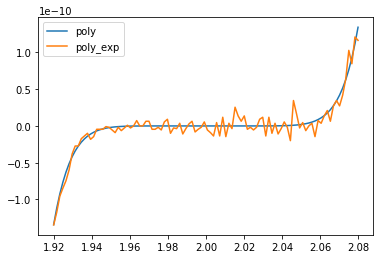

In [4]:
plt.plot(x, y, label='poly');
plt.plot(x, y_exp, label='poly_exp');
plt.legend();

This is an example of ill-conditioned algorithm, in this case polynomial.

**I don't really have an explanation to it.**

>2\. How many different double-precision numbers are there?  Express your answer using powers of 2

`double` has 64 bits, from which 1 is sign bit, 52 is mantissa and 11 is exponent. $2^{11}$ in exponent denotes infinities, and there are also +-0, reducing our total range of possibilities: $2^{64} - 2^{52} - 1$.

>3\. Using the updated [Numbers Every Programmer Should Know](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), how much longer does a main memory reference take than an L1 cache look-up?  How much longer does a disk seek take than a main memory reference?

1. 100 times longer
2. 20000 times longer

>4\. From the Halide Video, what are 4 ways to traverse a 2d array?

1. Serial y, serial x
2. Serial x, serial y
3. Serial y, vectorize x by 4
4. Parallel y, vectorize x by 4

>5\. Using the animations below ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.

### All at once, ahead of time
<img src="images/Halide1.gif" alt="Halide" style="width: 70%"/>
+ Easy to implement - sequential, independent steps
<br />
+ Each step is easily parallelizable
<br />
- High memory use
<br />
- Poor locality

### As needed, discarding after use
<img src="images/Halide2.gif" alt="Halide" style="width: 70%"/>
+ Low memory use
<br />
+ High locality
<br />
+ Each step is easily parallelizable
<br />
- Redundant computations

### As needed, reusing old values
<img src="images/Halide3.gif" alt="Halide" style="width: 70%"/>
+ High locality
<br />
- High memory use
<br />
- Not parallelizable, steps are interdependent

>6\. Prove that if $A = Q B Q^T$ for some orthnogonal matrix $Q$, the $A$ and $B$ have the same singular values.

Since $Q$ is orthogonal by definition, it's absolute eigenvalues are $1$. Hence, whatever $B$ does to the scale of space, remains the same after being multiplied by $Q$ and $Q^T$.

>7\. What is the *stochastic* part of *stochastic gradient descent*?

When using subset of samples to calculate gradient, we obtain an estimate of true gradient direction, so our gradient descent becomes **stochastic**, i.e. having random fluctuations while moving in general in the right direction.